In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Exp A

In [2]:
exp = "ExpA"

###########################################
# Distri of p
###########################################

set_ups = pd.read_csv(os.path.join("data", exp, "set_up.csv"))

all_p = []
p_per_propY = {"0.5": [], "0.85": []}

for i in range(len(set_ups)):

    set_up = set_ups.loc[i, "set_up"]
    p_i = load_data(set_up=set_up, data_type="original", exp=exp)["y_probs"]

    propY = set_ups.loc[i, "prop1"]

    
    p_per_propY[str(propY)].append(p_i)
    all_p.append(p_i)

all_p = np.array(all_p)
p_per_propY["0.5"] = np.array(p_per_propY["0.5"])
p_per_propY["0.85"] = np.array(p_per_propY["0.85"])

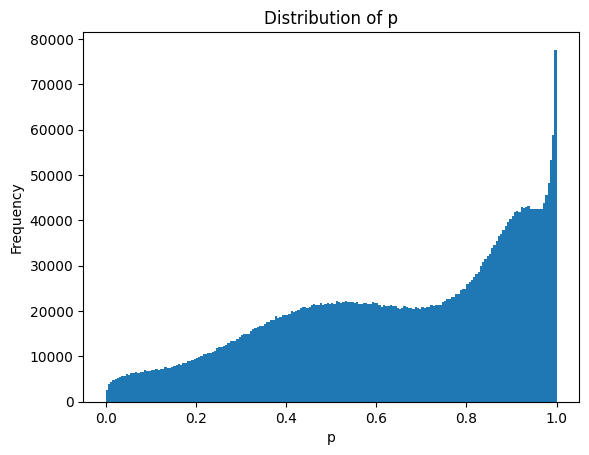

In [3]:
# plot hist of all_p

plt.hist(all_p.flatten(), bins=200)
plt.xlabel("p")
plt.ylabel("Frequency")
plt.title("Distribution of p")
plt.show()

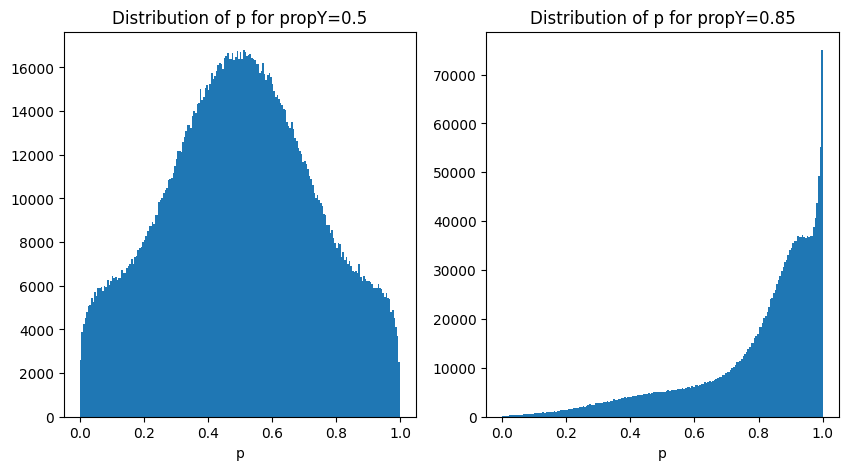

In [4]:
# 2 subplots: for propY=0.5 and propY=0.85

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, propY in enumerate(["0.5", "0.85"]):
    p_per_propY[propY] = p_per_propY[propY].flatten()
    axs[i].hist(p_per_propY[propY], bins=200)
    axs[i].set_xlabel("p")
    axs[i].set_title(f"Distribution of p for propY={propY}")
plt.show()

C:\Users\Chris\AppData\Local\Temp\ipykernel_17560\2246008952.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend(loc="upper left")
C:\Users\Chris\AppData\Local\Temp\ipykernel_17560\2246008952.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[2].legend(loc="upper left")


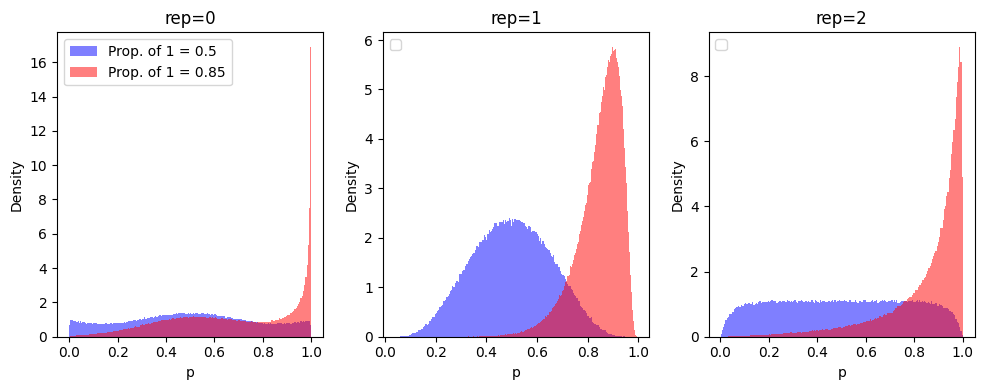

In [8]:

dict_probs_p105 = {
    0: [],
    1: [],
    2: [],
}

dict_probs_p1085 = {
    0: [],
    1: [],
    2: [],
}

for i in range(len(set_ups)):
    set_up = set_ups.loc[i, "set_up"]

    rep = set_ups.loc[i, "rep"]

    prop1 = set_ups.loc[i, "prop1"]

    p_i = load_data(set_up=set_up, data_type="original", exp=exp)["y_probs"]
    if prop1 == 0.5:
        dict_probs_p105[rep].extend(p_i)
    else:
        dict_probs_p1085[rep].extend(p_i)


fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for i, rep in enumerate([0, 1, 2]):

    if i == 0:
        # hist of probs
        axs[i].hist(dict_probs_p105[rep], bins=200, label="Prop. of 1 = 0.5", alpha=0.5, color="blue",density =True)
        axs[i].set_title(f"rep={rep}")

        axs[i].hist(dict_probs_p1085[rep], bins=200, label="Prop. of 1 = 0.85", alpha=0.5, color="red", density =True)
        axs[i].set_title(f"rep={rep}")

    else:
        axs[i].hist(dict_probs_p105[rep], bins=200, alpha=0.5, color="blue", density =True)
        axs[i].set_title(f"rep={rep}")

        axs[i].hist(dict_probs_p1085[rep], bins=200, alpha=0.5, color="red", density =True)
        axs[i].set_title(f"rep={rep}")

axs[0].set_xlabel("p")
axs[1].set_xlabel("p")
axs[2].set_xlabel("p")

axs[0].set_ylabel("Density")
axs[1].set_ylabel("Density")
axs[2].set_ylabel("Density")

axs[0].legend(loc="upper left")
axs[1].legend(loc="upper left")
axs[2].legend(loc="upper left")

plt.tight_layout()
plt.savefig("data/ExpA/figures/p_distribution.pdf")
plt.show()

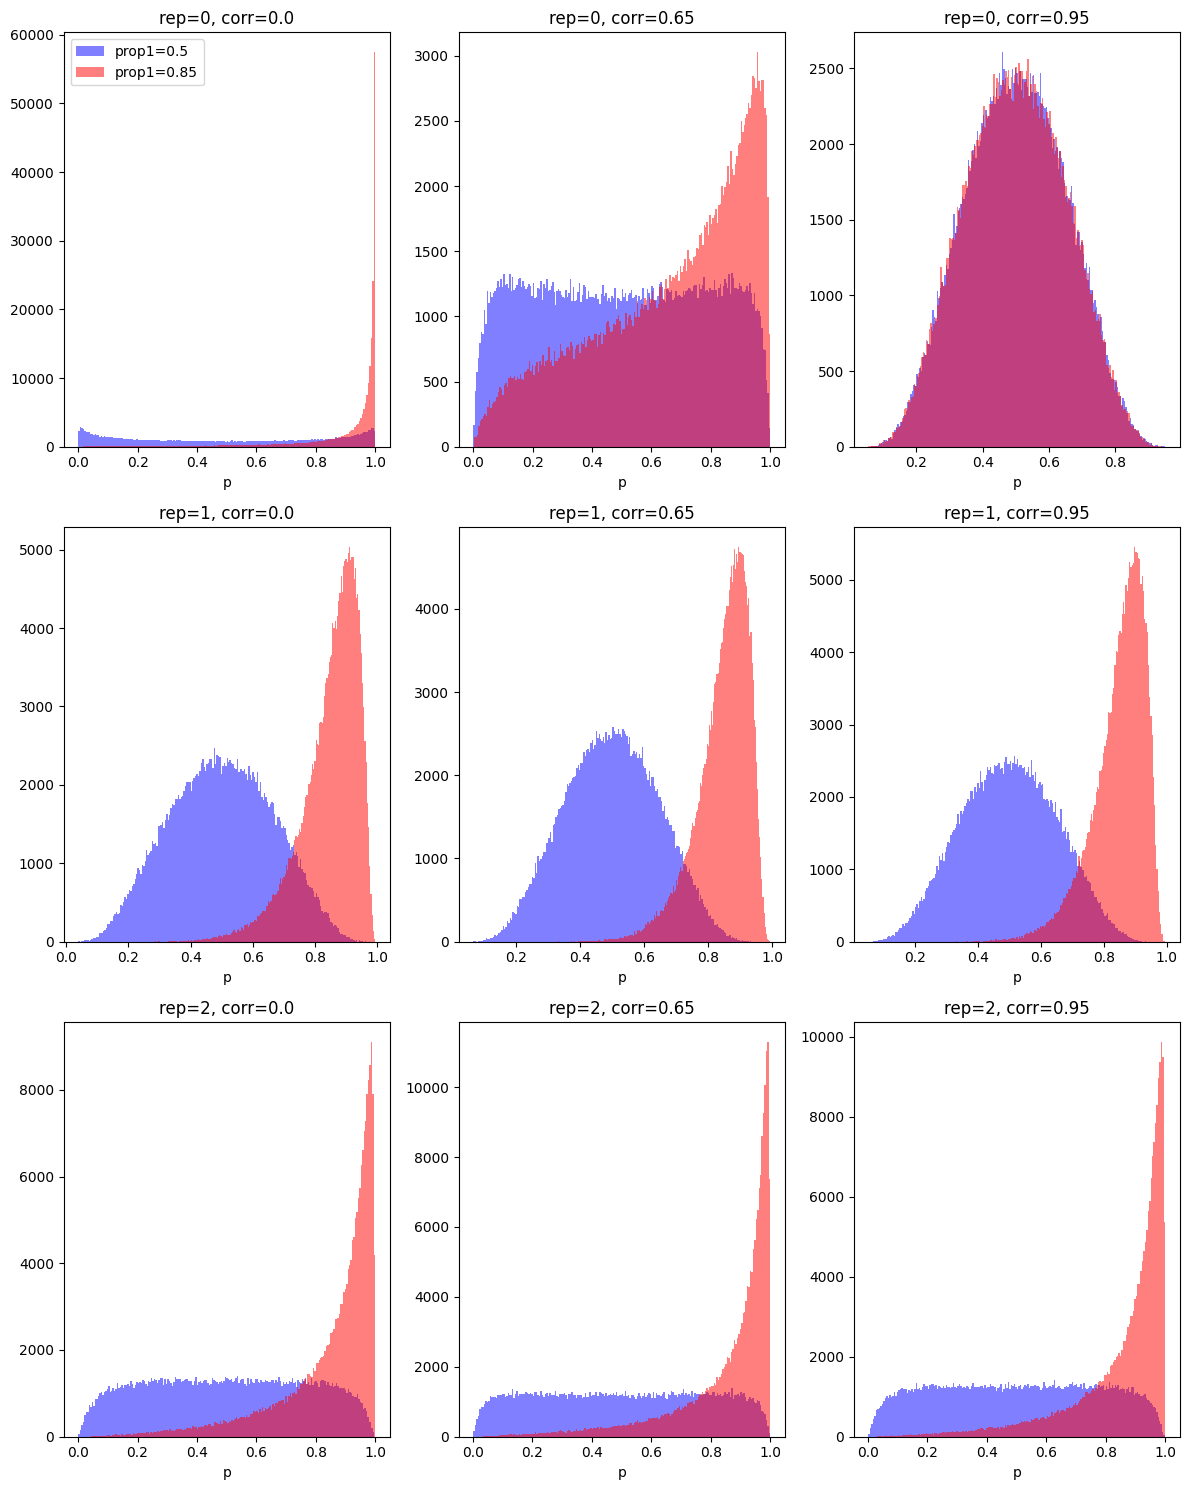

In [49]:
corrs = [0.,0.65,0.95]

dict_probs_p105 = {
    0: [],
    1: [],
    2: [],
}

dict_probs_p1085 = {
    0: [],
    1: [],
    2: [],
}

for k, v in dict_probs_p105.items():
    for corr in corrs:

        v.append([])

for k, v in dict_probs_p1085.items():
    for corr in corrs:

        v.append([])

for i in range(len(set_ups)):
    set_up = set_ups.loc[i, "set_up"]

    rep = set_ups.loc[i, "rep"]
    corr = set_ups.loc[i, "corr"]

    prop1 = set_ups.loc[i, "prop1"]

    p_i = load_data(set_up=set_up, data_type="original", exp=exp)["y_probs"]
    if prop1 == 0.5:
        dict_probs_p105[rep][corrs.index(corr)].append(p_i)
    else:
        dict_probs_p1085[rep][corrs.index(corr)].append(p_i)


fig, axs = plt.subplots(3, 3, figsize=(12, 15))      # 3 rows = 3 replicates, 3 columns = 3 correlations

for i, rep in enumerate([0, 1, 2]):
    for j, corr in enumerate(corrs):

        if i == 0 and j == 0:
            
            dict_probs_p105[rep][j] = np.array(dict_probs_p105[rep][j]).flatten()
            axs[i, j].hist(dict_probs_p105[rep][j], bins=200, color="blue", label="prop1=0.5", alpha=0.5)
            axs[i, j].set_xlabel("p")
            axs[i, j].set_title(f"rep={rep}, corr={corr}")

            dict_probs_p1085[rep][j] = np.array(dict_probs_p1085[rep][j]).flatten()
            axs[i, j].hist(dict_probs_p1085[rep][j], bins=200, color="red", label="prop1=0.85", alpha=0.5)
            axs[i, j].set_xlabel("p")
            axs[i, j].set_title(f"rep={rep}, corr={corr}")

            axs[i,j].legend()

        else:

            dict_probs_p105[rep][j] = np.array(dict_probs_p105[rep][j]).flatten()
            axs[i, j].hist(dict_probs_p105[rep][j], bins=200, color="blue", alpha=0.5)
            axs[i, j].set_xlabel("p")
            axs[i, j].set_title(f"rep={rep}, corr={corr}")

            dict_probs_p1085[rep][j] = np.array(dict_probs_p1085[rep][j]).flatten()
            axs[i, j].hist(dict_probs_p1085[rep][j], bins=200, color="red", alpha=0.5)
            axs[i, j].set_xlabel("p")
            axs[i, j].set_title(f"rep={rep}, corr={corr}")

plt.tight_layout()
# plt.savefig("data/ExpA/figures/p_distribution.pdf")
plt.show()

#### ExpB

In [62]:
set_ups

,rep,n,true_beta,center_X,set_up,d,corr,prcNA,centricity
0,0,115000,[ 0.6840908 0.68608696 -2.67442597 -0.276925...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent02_rep0,5,0.33,0.35,0.20
1,0,115000,[-0.01300005 0.55776312 -1.27287515 1.311103...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent035_rep0,5,0.33,0.35,0.35
2,0,115000,[ 0.18371939 -0.11054488 -0.0268332 -0.014961...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent085_rep0,5,0.33,0.35,0.85
3,1,115000,[ 2.90047604 -0.63137502 0.09574834 1.019271...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent02_rep1,5,0.33,0.35,0.20
4,1,115000,[-0.51487657 0.26239143 0.23607627 -1.118632...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent035_rep1,5,0.33,0.35,0.35
5,1,115000,[ 0.02511439 0.16338525 -0.07011715 -0.068595...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent085_rep1,5,0.33,0.35,0.85
6,2,115000,[-2.87632109 -0.21626943 0.90556445 0.205749...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent02_rep2,5,0.33,0.35,0.20
7,2,115000,[-0.31670486 -0.42017587 0.98918238 -0.171290...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent035_rep2,5,0.33,0.35,0.35
8,2,115000,[ 0.17601416 -0.00340526 0.08595427 -0.018905...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent085_rep2,5,0.33,0.35,0.85
9,3,115000,[-1.66502105 0.23246844 -0.76943272 -0.604123...,[0. 0. 0. 0. 0.],LOG_n115000_d5_corr033_prcNA035_cent02_rep3,5,0.33,0.35,0.20


In [3]:
exp = "ExpB"

###########################################
# Distri of p
###########################################

set_ups = pd.read_csv(os.path.join("data", exp, "set_up.csv"))

all_p = []
p_per_propY = {"0.2": [], "0.35": [], "0.85": []}

for i in range(len(set_ups)):

    set_up = set_ups.loc[i, "set_up"]
    p_i = load_data(set_up=set_up, data_type="original", exp=exp)["y_probs"]

    propY = set_ups.loc[i, "centricity"]

    
    p_per_propY[str(propY)].append(p_i)
    all_p.append(p_i)

all_p = np.array(all_p)
p_per_propY["0.2"] = np.array(p_per_propY["0.2"])
p_per_propY["0.35"] = np.array(p_per_propY["0.35"])
p_per_propY["0.85"] = np.array(p_per_propY["0.85"])

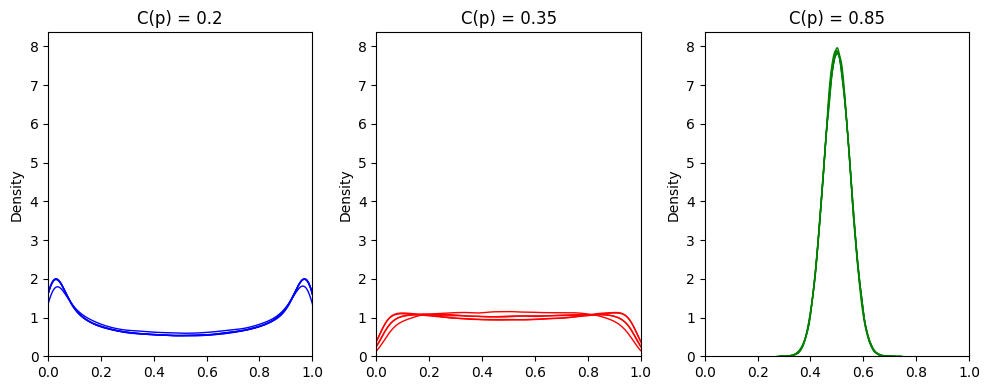

In [13]:

dict_probs_c020 = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
}

dict_probs_c035 = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
}

dict_probs_c085 = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: [],
}

for i in range(len(set_ups)):
    set_up = set_ups.loc[i, "set_up"]

    rep = set_ups.loc[i, "rep"]

    cent = set_ups.loc[i, "centricity"]

    p_i = load_data(set_up=set_up, data_type="original", exp=exp)["y_probs"]
    if cent == 0.2:
        dict_probs_c020[rep].extend(p_i)
    elif cent == 0.35:
        dict_probs_c035[rep].extend(p_i)
        
    else:
        dict_probs_c085[rep].extend(p_i)


import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the plot with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# For dict_probs_c020 (blue lines)
for rep in dict_probs_c020:
    sns.kdeplot(dict_probs_c020[rep], ax=axs[0], color="blue", lw=1, label=f"Rep {rep}")

# For dict_probs_c035 (red lines)
for rep in dict_probs_c035:
    sns.kdeplot(dict_probs_c035[rep], ax=axs[1], color="red", lw=1, label=f"Rep {rep}")

# For dict_probs_c085 (green lines)
for rep in dict_probs_c085:
    sns.kdeplot(dict_probs_c085[rep], ax=axs[2], color="green", lw=1, label=f"Rep {rep}")


axs[0].set_title("C(p) = 0.2")
axs[1].set_title("C(p) = 0.35")
axs[2].set_title("C(p) = 0.85")

# set same ylim for all subplots
max_y = max([ax.get_ylim()[1] for ax in axs])
for ax in axs:
    ax.set_ylim(0, max_y)

# xlim : 0 to 1
for ax in axs:
    ax.set_xlim(0, 1)

# Adjust layout for better spacing
plt.tight_layout()

# save the plot
# plt.savefig("data/ExpB/figures/p_distribution.pdf")

# Show the plot
plt.show()


In [ ]:
# ##########################################
# # Recompute BAYES
# ##########################################

# import pandas as pd
# import os
# import numpy as np
# from utils import *

# Exp = "ExpA"

# set_ups = pd.read_csv(f"data/{Exp}/set_up.csv")

# for i in range(set_ups.shape[0]):
#     print(f"Processing {i+1}/{set_ups.shape[0]}")
#     set_up_name = set_ups.iloc[i, 5]
#     X_center = set_ups.loc[i, "center_X"]
#     cov = set_ups.loc[i, "corr"]

#     X_center = X_center[1:-1].split()
#     X_center = np.array([float(x) for x in X_center])

#     test_X = load_data(set_up_name, data_type="test", exp=Exp)["X_obs"]

#     true_beta = set_ups.loc[i, "true_beta"]
#     true_beta = true_beta[1:-1].split()
#     true_beta = np.array([float(x) for x in true_beta])

#     y_probs_bayes = get_y_prob_bayes(test_X, X_center, toep(5, cov), true_beta, n_mc=2500) 
#     y_probs_bayes = y_probs_bayes.mean(axis=1)

#     # save Y-probs_bayes
#     data_to_save_bayes = {
#         "y_probs_bayes": y_probs_bayes
#     }

#     np.savez(os.path.join("data", "ExpA", "bayes_data", f"{set_up_name}.npz"), **data_to_save_bayes)
    

Processing 1/36
Processing 2/36
Processing 3/36
Processing 4/36
Processing 5/36
Processing 6/36
Processing 7/36
Processing 8/36
Processing 9/36
Processing 10/36
Processing 11/36
Processing 12/36
Processing 13/36
Processing 14/36
Processing 15/36
Processing 16/36
Processing 17/36
Processing 18/36
Processing 19/36
Processing 20/36
Processing 21/36
Processing 22/36
Processing 23/36
Processing 24/36
Processing 25/36
Processing 26/36
Processing 27/36
Processing 28/36
Processing 29/36
Processing 30/36
Processing 31/36
Processing 32/36
Processing 33/36
Processing 34/36
Processing 35/36
Processing 36/36


In [29]:
# ##########################################
# # Recompute BAYES
# ##########################################

# import pandas as pd
# import os
# import numpy as np
# from utils import *

# Exp = "ExpA"

# set_ups = pd.read_csv(f"data/{Exp}/set_up.csv")

# for i in range(set_ups.shape[0]):
#     print(f"Processing {i+1}/{set_ups.shape[0]}")
#     set_up_name = set_ups.iloc[i, 5]
#     X_center = set_ups.loc[i, "center_X"]
#     cov = set_ups.loc[i, "corr"]

#     X_center = X_center[1:-1].split()
#     X_center = np.array([float(x) for x in X_center])

#     test_X = load_data(set_up_name, data_type="test", exp=Exp)["X_obs"]

#     true_beta = set_ups.loc[i, "true_beta"]
#     true_beta = true_beta[1:-1].split()
#     true_beta = np.array([float(x) for x in true_beta])

#     y_probs_bayes = get_y_prob_bayes(test_X, X_center, toep(5, cov), true_beta, n_mc=2500) 
#     y_probs_bayes = y_probs_bayes.mean(axis=1)

#     # save Y-probs_bayes
#     data_to_save_bayes = {
#         "y_probs_bayes": y_probs_bayes
#     }

#     np.savez(os.path.join("data", "ExpA", "bayes_data", f"{set_up_name}.npz"), **data_to_save_bayes)
    